# Clasificación de erupciones volcánicas
## Sirai Juan

<img src = "https://volcanofoundation.org/wp-content/uploads/2021/06/4-days-mount-ol-doinyo-lengai-banner-min.jpeg" width=1200>

## Sobre el desafio

Jorge es un geólogo del IGME (Instituto Geológico y Minero de España) que está desarrollando un nuevo sistema de prevención de erupciones para poder predecir qué tipo de erupción tendrá un volcán según las las vibraciones detectadas por sus sensores durante los días previos a la erupción. Esto permitirá reducir el riesgo de víctimas y destrozos materiales por este tipo de catástrofe natural.
El sistema de Jorge trabaja con 5 tipos de erupciones:

* Pliniana: Se caracteriza por su alto grado de explosividad, con manifestaciones muy violentas en las cuales se expulsan grandes volúmenes de gas volcánico, fragmentos y cenizas.

* Peleana: La característica más importante de una erupción peleana es la presencia de una avalancha brillante de ceniza volcánica caliente, llamada flujo piroclástico.

* Vulcaniana: Son erupciones volcánicas de tipo explosivo. El material magmático liberado es más viscoso que en el caso de las erupciones hawaianas o estrombolianas; consecuentemente, se acumula más presión desde la cámara magmática conforme el magma asciende hacia la superficie.

* Hawaiana: Consiste en la emisión de material volcánico, mayoritariamente basáltico, de manera efusiva o no explosiva. Ocurre de este modo debido a que la difusión de los gases a través de magmas más básicos (basálticos) puede hacerse de manera lenta pero más o menos continua. Consecuentemente, las erupciones volcánicas de este tipo no suelen ser muy destructivas.

* Estromboliana: La erupción Estromboliana está caracterizada por erupciones explosivas separadas por periodos de calma de duración variable. El proceso de cada explosión corresponde a la evolución de una burbuja de gases liberados por el propio magma.

El objetivo de este reto será ayudar a Jorge realizando el modelado predictivo a partir de un dataset que contiene las mediciones hechas por sus sensores y tipos.

## Dataset

**Features:** El dataset contiene 6 features en 6 columnas, que son los parámetros medidos por los diferentes sensores. Estos corresponden a las vibraciones detectadas en ciertos puntos de la ladera del volcán.

**Target:** El target corresponde al 'label' que clasifica los tipos de erupciones volcánicas en función de los features medidos por los sensores.

* Target 0 corresponde a una erupción de tipo Pliniana
* Target 1 corresponde a una erupción de tipo Peleana
* Target 2 corresponde a una erupción de tipo Vulcaniana
* Target 3 corresponde a una erupción de tipo Hawaiana
* Target 4 corresponde a una erupción de tipo Estromboliana
------------------------------------------------------------------------------


# Librerias

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

# EDA

## Data Quality

Para el analisis exploratorio inicial, procederemos primero a cargar nuestro dataset de entrenamiento, y evaluar la calidad del mismo en términos de completitud de variables, tipos de datos y escalas.

In [34]:
# Importamos el dataset de entrenamiento
df = pd.read_csv("Data/jm_train.csv")

In [35]:
df.head(2)

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0


In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feature1,2100.0,-0.204656,1.543613,-6.683655,-1.171340,-0.443868,0.890023,4.565547
feature2,2100.0,0.199249,1.614024,-5.383371,-0.877386,0.320507,1.321430,6.700133
feature3,2100.0,-0.378140,1.450548,-6.147055,-1.365990,-0.439745,0.662898,4.157518
feature4,2100.0,-0.206425,1.442225,-5.653594,-1.259403,-0.176504,0.866879,4.371912
feature5,2100.0,-0.186419,1.501573,-5.912521,-1.211685,-0.195751,0.851843,5.068783
feature6,2100.0,-0.433229,1.188791,-4.433189,-1.131944,-0.406754,0.348593,4.016324
target,2100.0,1.980476,1.410537,0.000000,1.000000,2.000000,3.000000,4.000000


In [37]:
df.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


## Data Viz

Procederemos a realizar algunas visualizaciones para tener un primer acercamiento a la distribución de nuestras features, asi como su relación al target.



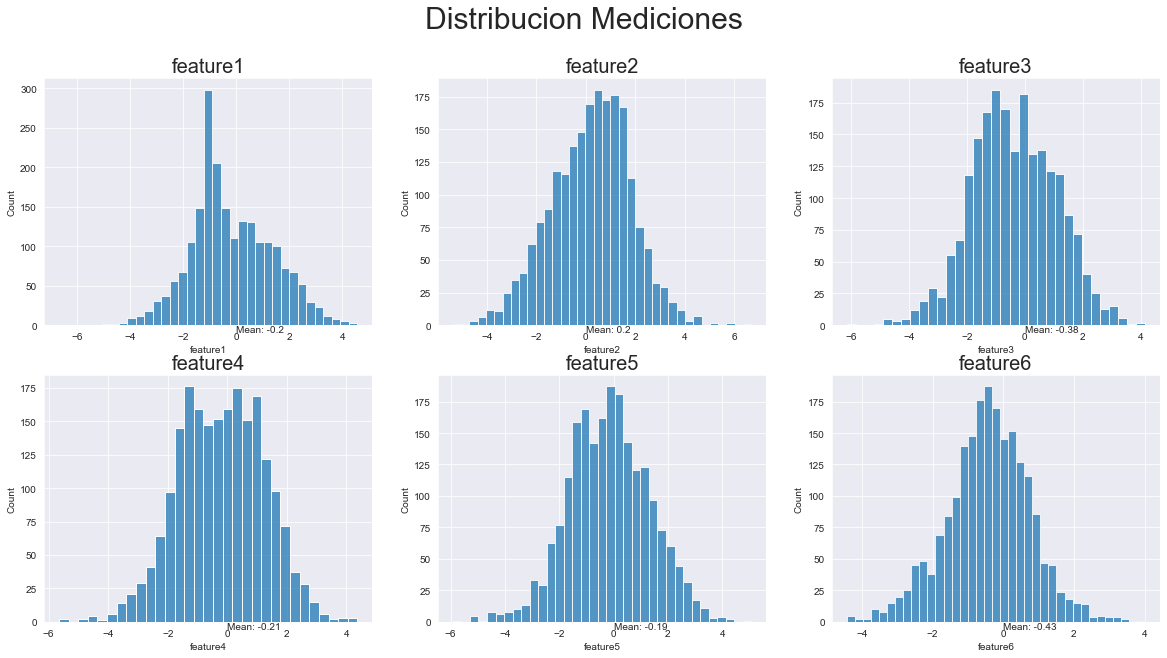

In [39]:
fig, axis = plt.subplots(2, 3, figsize=(20, 10))
column = 0
row = 0
features = list(df.columns)[:-1]
plt.suptitle('Distribucion Mediciones', fontsize=30)
for col in features:
    axis[row, column].set_title(col, size=20)
    box = sns.histplot(x=col, data=df, ax=axis[row, column], palette='Pastel2')
    box.annotate(f"Mean: {df[col].mean().round(2)}", xy=(0, 0), verticalalignment='top')
    if column == 2:
        column = 0
        row += 1
    else:
        column += 1

Text(0.5, 1.0, 'Matriz de correlacion')

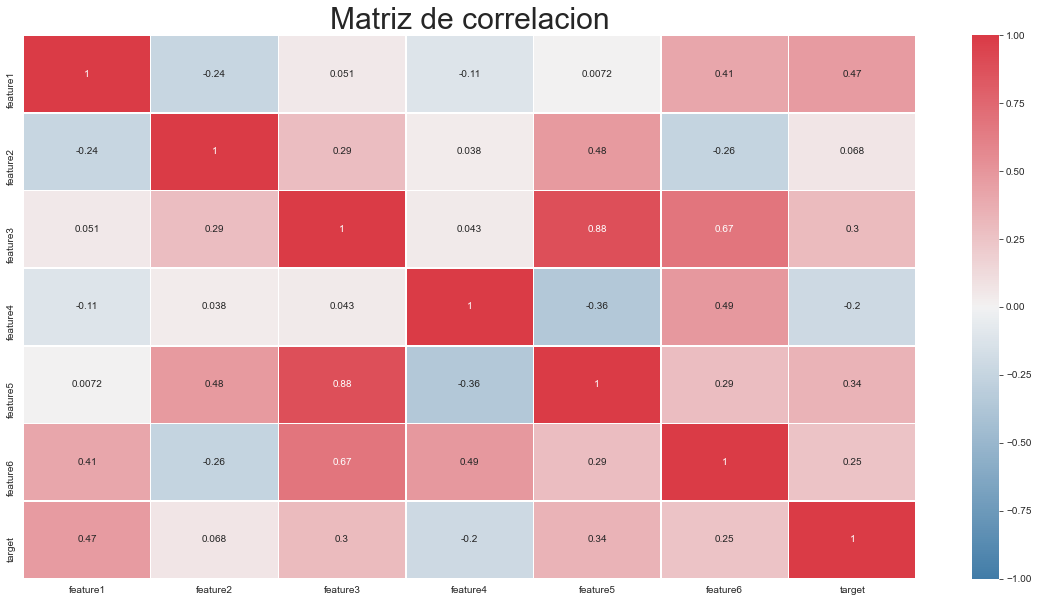

In [40]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), linewidths=.5, vmin = -1, vmax = 1, annot = True, cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True) )

plt.title("Matriz de correlacion", size=30)

De la matriz de correlación podemos observar que:
* La variable target tiene correlación fuerte y en sentido positivo con "Feature 1" y "Feature 5"
* Las variables "Feature 5" y "Feature 3", así como "Feature 3" y "Feature 6" tienen fuerte correlación entre si. Esto podría ocasionar problemas si implementamos a futuro modelos lineales.

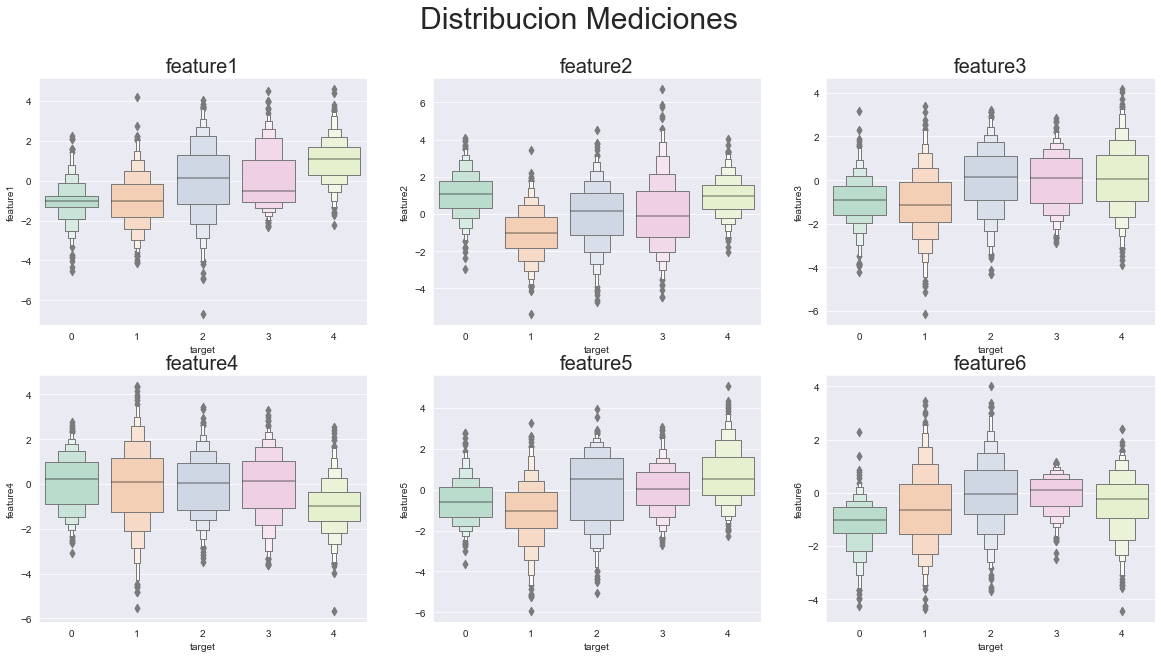

In [45]:
df['target'] = df['target'].astype('str')
fig, axis = plt.subplots(2, 3, figsize=(20, 10))
column = 0
row = 0
features = list(df.columns)[:-1]
plt.suptitle('Distribucion Mediciones', fontsize=30)
for col in features:
    axis[row, column].set_title(col, size=20)
    box = sns.boxenplot(y=col ,data=df,x=df['target'] ,ax=axis[row, column], palette='Pastel2',order=['0','1','2','3','4'])
    if column == 2:
        column = 0
        row += 1
    else:
        column += 1

Algunas conclusiones preliminares:
* Tipo de erupcion 4 posee valores de medicion de feature 1 y feature 5 mas altas, y con menos rango de variacion.
* Feature 4 arroja medianas similares para casi todos los tipos de erupciones (excepto la 4)
* La feature dos arroja valores medios bajos para el tipo de erupción 1.
* Feature 3 se comporta muy distinto para las erupciones de tipo 0 y 1, que para las restantes.

# Entrenamiento de Modelos y Seleccion de Features

In [49]:
df['target'] = df['target'].astype('int64')

# Eliminamos la feature 2 por tener baja correlacion con nuestro target
data_clean = df.drop(labels=['feature2'], axis=1)

# train, test split

X = data_clean.drop(columns=['target'])
y = data_clean.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
y_train.value_counts()

3    350
0    346
1    332
2    331
4    321
Name: target, dtype: int64

Por lo que podemos observar, la variable target está equitativamente distribuida. No necesitamos re samplear la data.

## Random Forest Classifier

In [52]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [55]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        81
           1       0.72      0.59      0.65        91
           2       0.78      0.70      0.74        88
           3       0.74      0.80      0.77        76
           4       0.74      0.76      0.75        84

    accuracy                           0.75       420
   macro avg       0.74      0.75      0.74       420
weighted avg       0.74      0.75      0.74       420



Hasta el momento random forest se muestra con resultados aceptables para una linea base.

## Stochastic Gradient Decent Classifier

In [56]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [57]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.52      0.16      0.25        81
           1       0.57      0.88      0.69        91
           2       0.28      0.24      0.26        88
           3       0.14      0.22      0.17        76
           4       0.60      0.40      0.48        84

    accuracy                           0.39       420
   macro avg       0.42      0.38      0.37       420
weighted avg       0.43      0.39      0.38       420



Como podemos observar, los resultados de este modelo no superan a nuestro baseline

## Support Vector Classifier



In [61]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [62]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        81
           1       0.74      0.69      0.72        91
           2       0.75      0.68      0.71        88
           3       0.71      0.86      0.77        76
           4       0.80      0.81      0.80        84

    accuracy                           0.76       420
   macro avg       0.76      0.77      0.76       420
weighted avg       0.76      0.76      0.76       420



## Gradient Boost Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

In [64]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        81
           1       0.73      0.57      0.64        91
           2       0.71      0.62      0.66        88
           3       0.70      0.78      0.74        76
           4       0.72      0.75      0.73        84

    accuracy                           0.71       420
   macro avg       0.71      0.72      0.71       420
weighted avg       0.72      0.71      0.71       420



## ADA Boost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

params_ab = {"n_estimators": [500,1000],
             "learning_rate":[0.01, 0.1],
             "base_estimator__max_depth": [1, 2, 3]}

cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)
grid_ab = GridSearchCV(AdaBoostClassifier(base_estimator=dt,random_state=1),
                       param_grid=params_ab, cv=cv, verbose=1, n_jobs=3)

In [77]:
grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   45.5s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                          random_state=1),
             n_jobs=3,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [78]:
grid_ab.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=1000, random_state=1)

In [80]:
pred_ab = grid_ab.best_estimator_.predict(X_test)

In [81]:
print(classification_report(y_test, pred_ab))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        81
           1       0.60      0.46      0.52        91
           2       0.60      0.64      0.62        88
           3       0.64      0.71      0.67        76
           4       0.71      0.73      0.72        84

    accuracy                           0.64       420
   macro avg       0.64      0.65      0.64       420
weighted avg       0.64      0.64      0.64       420



No hemos obtenido un buen rendimiento con AB.
Veamos si podemos mejorar nuestro Gradient Boost Clasiffier

## Gradient Boost Classifier Mejorado

In [84]:
params_gb = {'n_estimators':[500, 1000] ,
             'learning_rate':[ 0.01, 0.1],
             'max_depth' : [1, 2, 3]}

grid_gb = GridSearchCV(gbc, param_grid=params_gb, cv=cv, verbose=1, n_jobs=3)

In [85]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  4.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 2, 3],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [86]:
grid_gb_pred = grid_gb.best_estimator_.predict(X_test)
print(classification_report(y_test, grid_gb_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        81
           1       0.70      0.56      0.62        91
           2       0.67      0.64      0.65        88
           3       0.69      0.78      0.73        76
           4       0.73      0.73      0.73        84

    accuracy                           0.70       420
   macro avg       0.70      0.71      0.70       420
weighted avg       0.70      0.70      0.70       420



-------------------------------------------

Podemos observar que hasta el momento, nuestro modelo con SVC fue el que mejores resultados obtuvos.
Vamos a continuar iterando sobre este modelo con dos propuestas:
* Estandarizar las features, dado que es un modelo que trabaja sobre vectores, es sensible a la escala de los inputs.
* Optimizacion con GridSearchCV

## Estandarizacion de features

In [66]:
scaler_f=StandardScaler()
X_train_sc = scaler_f.fit_transform(X_train)
X_test_sc = scaler_f.transform(X_test)

svc = SVC()
svc.fit(X_train_sc, y_train)
pred_svc_sc = svc.predict(X_test_sc)

In [67]:
print(classification_report(y_test, pred_svc_sc))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        81
           1       0.74      0.69      0.72        91
           2       0.74      0.68      0.71        88
           3       0.72      0.84      0.78        76
           4       0.79      0.82      0.81        84

    accuracy                           0.76       420
   macro avg       0.76      0.77      0.76       420
weighted avg       0.76      0.76      0.76       420



## Optimizacion con Grid Search

* Núcleos: la función principal del núcleo es tomar un espacio de entrada de baja dimensión y transformarlo en un espacio de mayor dimensión. Es principalmente útil en problemas de separación no lineal.

* C (Regularización): C es el parámetro de penalización, que representa clasificación errónea o término de error. El término de clasificación errónea o error le dice a la optimización de SVM cuánto error es soportable. Así es como puede controlar el equilibrio entre el límite de decisión y el término de clasificación errónea.

* Gamma: Define en qué medida influye en el cálculo de la línea plausible de separación. Cuando gamma es mayor, los puntos cercanos tendrán una gran influencia; gama baja significa que también se deben considerar los puntos lejanos para obtener el límite de decisión. Núcleos: la función principal del núcleo es tomar un espacio de entrada de baja dimensión y transformarlo en un espacio de mayor dimensión. Es principalmente útil en problemas de separación no lineal.


In [88]:


param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_sc,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   12.9s finished


In [71]:
grid_predictions = grid.predict(X_test_sc)

In [72]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.79        81
           1       0.76      0.74      0.75        91
           2       0.78      0.72      0.75        88
           3       0.71      0.87      0.78        76
           4       0.82      0.81      0.81        84

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



# Predicciones

In [74]:
real = pd.read_csv("Data/jm_X_test.csv")

In [75]:
real.head(2)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068


Dado que ya conocemos los pasos de preprocesamiento que aplicamos en nuestro dataset de testeo, vamos a definir una función que generalize los mismos en términos de seleccion de columnas, y estandarizacion.

In [89]:
def predict_svc(test, model):
    data_clean = test.drop(labels=['feature2'], axis=1)
    data_sc = scaler_f.transform(data_clean)
    predictions = model.predict(data_sc)
    data_final = pd.DataFrame(predictions,columns=['final_status'])
    return data_final

In [90]:
dataset_predicciones = predict_svc(real, grid)

In [91]:
dataset_predicciones.head(2)

,final_status
0,1
1,3


In [94]:
import os
current_dir = os.getcwd()
path_predictions = os.path.join(current_dir,"predictions.csv")
dataset_predicciones.to_csv(path_predictions, index=False)